In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/imdb_scraped.csv')

In [3]:
df.head(3)

,Unnamed: 0,Title,Year,Genre,Director,Cast,Movie_id
0,0,Aama,(1964),"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
1,1,Maitighar,(1966),"Drama, Musical",B.S. Thapa\n |,"['Mala Sinha', 'Chidambar Prasad Lohani', 'Tik...",/title/tt7051562/
2,2,Hijo Aaja Bholi,(1968),Drama,Hira Singh Khatri\n |,"['Basundhara Bhusal', 'Bhubhan Chand', 'Shreed...",/title/tt8378014/


In [4]:
df=df.drop(columns='Unnamed: 0')

### NULL Values

In [5]:
df.isnull().sum()

Title        0
Year        16
Genre       76
Director    12
Cast         0
Movie_id     0
dtype: int64

In [6]:
df=df[~(df['Year']=='Notes')]

In [7]:
df['Year'].value_counts()

Year
(2018)          58
(2019)          52
(2017)          39
(2016)          39
(2022)          36
                ..
(III) (2013)     1
(II) (2014)      1
(I) (2015)       1
(IV) (2016)      1
(I)              1
Name: count, Length: 77, dtype: int64

### Cleaning year column

In [8]:
df['Year'].unique()

array(['(1964)', '(1966)', '(1968)', '(1971)', '(1973)', '(1977)',
       '(1978)', '(1980)', '(1981)', '(1982)', '(1983)', '(1984)',
       '(1985)', '(1987)', '(1989)', '(1990)', '(1991)', '(1993)',
       '(1994)', '(1995)', '(1996)', '(1997)', '(1998)', '(1999)',
       '(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)', '(2003)',
       '(2004)', '(2005)', '(2006)', '(2007)', '(2008)', '(2009)',
       '(2010)', '(V) (2010)', '(2011)', '(II) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(II) (2013)', '(III) (2013)', '(2014)',
       '(II) (2014)', '(I) (2015)', '(2015)', '(2016)', '(IV) (2016)',
       '(III) (2016)', '(I) (2016)', '(II) (2016)', '(VI) (2016)',
       '(I) (2017)', '(2017)', '(III) (2017)', '(2018)', '(VII) (2018)',
       '(I) (2018)', '(II) (2018)', '(2019)', '(I) (2019)', '(V) (2019)',
       '(2020)', '(I) (2020)', '(2021)', '(VI) (2021)', '(2022)',
       '(II) (2022)', '(2023)', '(I) (2023)', '(II) (2023)', '(2024)',
       nan, '(III)', '(I)'], d

In [9]:
pattern=r'\((\d{4})\)'

In [10]:
re.search(pattern, '(II) (2022)').group(1)

'2022'

In [11]:
def extract_year(s):
    match = re.search(pattern, s)
    if match:
        return match.group(1)
    else:
        return None

In [12]:
df['Year']=df['Year'].astype('str').apply(extract_year)
# df['Year'].astype('int')

In [13]:
df['Year']

0      1964
1      1966
2      1968
3      1971
4      1973
       ... 
645    None
646    None
647    None
648    None
649    None
Name: Year, Length: 650, dtype: object

In [14]:
df=df[~df['Year'].isnull()]

### Cleaning movie names

In [15]:
df['Title']=df['Title'].str.lower()

In [16]:
df['Title'].unique()

array(['aama', 'maitighar', 'hijo aaja bholi', 'parivartan',
       'man ko bandh', 'kumari', 'paral ko aago', 'sindoor',
       'raiders of the lost ark', 'bansuri', 'jeevan rekha', 'samjhana',
       'kanchi', 'basudev', 'kusume rumal', 'saino', 'anyay', 'santan',
       'cheli beti', 'lahure', 'behuli', 'maya preeti', 'bhagya rekha',
       'pachhis basanta', 'lobhi papi', 'bijay parajay', 'kanyadaan',
       'yug dekhi yug samma', 'chino', 'aadhi beri', 'dakshina', 'deuta',
       'dui thopa aansu', 'sapana', 'sauta', 'adhikar', 'mahadevi',
       'mohani', 'swarga', 'janma janma', 'prithvi', 'shree swosthani',
       'sannani', 'mahamaya', 'prem pinda', 'jeevan sangharsha', 'ragat',
       'saraswati', 'janma bhoomi', 'rahar', 'gothalo', 'seemana',
       'bhariya', 'chunauti', 'raanko', 'simarekha', 'balidaan',
       'karodpati', 'shankar', 'naso', 'saathi', 'allare',
       'aadi kabi bhanubhakta', 'thuldai', 'nepali babu', 'afanta',
       'nata ragat ko', 'yo maya ko sagar', 

In [17]:
movie_counts=df['Title'].value_counts()

In [18]:
movies_more_than_once = movie_counts[movie_counts > 1].index.values

In [19]:
df[df['Title'].isin(movies_more_than_once)]

,Title,Year,Genre,Director,Cast,Movie_id
0,aama,1964,"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
527,aama,2020,Drama,Dipendra K. Khanal\n |,"['Narendra Singh Dhami', 'Sarita Giri', 'Deshb...",/title/tt12320684/
603,aincho paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549224/
610,aincho paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549232/


In [20]:
df=df.drop([527,603])

In [21]:
df.shape

(630, 6)

**Cleaning Director name**

In [22]:
df['Director']

0      Hira Singh Khatri\n                 |
1             B.S. Thapa\n                 |
2      Hira Singh Khatri\n                 |
3      Hira Singh Khatri\n                 |
4          Prakash Thapa\n                 |
                       ...                  
627          Santosh Sen\n                 |
628                            Niren Shresth
629     Ramesh Mk Poudel\n                 |
630    Narayan Rayamajhi\n                 |
631           Kumud Pant\n                 |
Name: Director, Length: 630, dtype: object

In [23]:
df['Director'] = df['Director'].str.replace('\n', '').str.replace('|', '').str.lower()


In [45]:
df['Director'].value_counts().values

array([16, 12, 10, 10,  9,  9,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  6,
        6,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [25]:
new_row=df[df['Title']=='lalteen']

In [26]:
new_row['Director']='dev kumar shrestha'

C:\Users\sunne\AppData\Local\Temp\ipykernel_4608\4055978200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row['Director']='sunil'


In [27]:
df=df[~df['Director'].isnull()]

In [28]:
df = pd.concat([df, new_row], ignore_index=True)

In [29]:
df[df['Director'].isnull()]

,Title,Year,Genre,Director,Cast,Movie_id


### Cleaning cast 

In [30]:
df['Cast'].value_counts()

Cast
['tor:\nPranitAcharjuNewar\n                 | \n    Star:\nPranitAcharjuNewar']    3
['Gauri Malla']                                                                     2
['Pradeep Khadka', 'Miruna Magar', 'Paramita Rana', 'Karma Shakya']                 1
['Sunil Thapa', 'Karma Shakya', 'Menuka Pradhan', 'Rabindra Jha']                   1
['Anmol K.C.', 'Aditi Budhathoki', 'Anoop Bikram Shahi', 'Kameshwor Chaurasiya']    1
                                                                                   ..
['Arpan Thapa', 'Samuna K.C', 'Dhurba Koirala', 'Kamala Regmi']                     1
['Niraj Baral', 'Priyanka Karki', 'Pooja Sharma', 'Devu Shrestha']                  1
['Madan Baral', 'Manju Devkota', 'Sunil Pokharel', 'Mahesh Shrestha']               1
['Nisha Adhikari', 'Gajit Bista', 'Rajesh Hamal', 'Karishma Manandhar']             1
['Keki Adhikari', 'Janak Bartaula', 'Shishir Bhandari', 'Ram Keshari Bogati']       1
Name: count, Length: 616, dtype: int64

In [47]:
df[df['Cast']=="['tor:\nPranitAcharjuNewar\n                 | \n    Star:\nPranitAcharjuNewar']"]

,Title,Year,Genre,Director,Cast,Movie_id,cast_no


In [33]:
def find_no_of_cast(cast):
    cast=cast[1:-1].split(',')
    return len(cast)


In [34]:
df['cast_no']=df['Cast'].apply(find_no_of_cast)

In [35]:
cast_no_counts=df['cast_no'].value_counts()

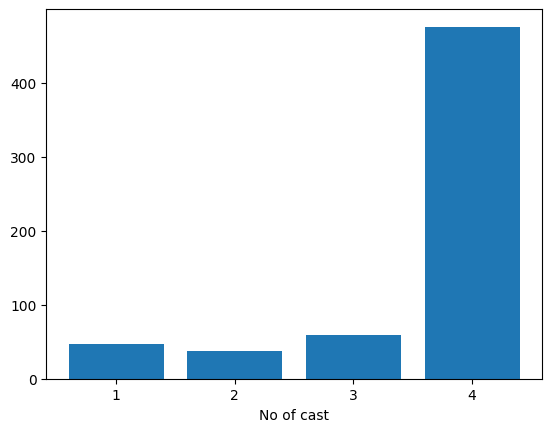

In [36]:
plt.bar(cast_no_counts.index,cast_no_counts.values)
plt.xticks(cast_no_counts.index)
plt.xlabel('No of cast')
plt.show()

### Genres

In [37]:
genre_counts=df['Genre'].value_counts()

In [38]:
genre_counts

Genre
Drama                        198
Romance                       50
Drama, Romance                47
Action                        31
Comedy                        28
                            ... 
Comedy, Drama, Family          1
Action, Comedy, Romance        1
Comedy, Drama, Sci-Fi          1
Drama, Family, Romance         1
Biography, Drama, History      1
Name: count, Length: 79, dtype: int64

In [39]:
genres=[]
for genre, count in genre_counts.items():
    # print(f'Genre: {genre}, Count: {count}')
    genres.extend(genre.split(','))
    

In [40]:
genres=[genre.strip() for genre in genres]
genres=set(genres)
genres=list(genres)

In [41]:
len(genres)

20

In [42]:
with open('genres.txt','w') as genres_file:
    for genre in genres:
        genres_file.write(genre+ '\n')
     

In [43]:
df

,Title,Year,Genre,Director,Cast,Movie_id,cast_no
0,aama,1964,"Action, Drama",hira singh khatri,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/,4
1,maitighar,1966,"Drama, Musical",b.s. thapa,"['Mala Sinha', 'Chidambar Prasad Lohani', 'Tik...",/title/tt7051562/,4
2,hijo aaja bholi,1968,Drama,hira singh khatri,"['Basundhara Bhusal', 'Bhubhan Chand', 'Shreed...",/title/tt8378014/,4
3,parivartan,1971,Drama,hira singh khatri,"['Yagya Nath Ghimire', 'Rita Thapa', 'Neer Bik...",/title/tt8379858/,4
4,man ko bandh,1973,Drama,prakash thapa,"['Salyan K.C.', 'Sushma Shahi', 'Neer Bikram S...",/title/tt1999922/,4
...,...,...,...,...,...,...,...
614,chaubandi,2023,Drama,niren shresth,['tor:\nNiren Shrestha'],/title/tt28355450/,1
615,timro mero sath,2023,"Drama, Romance",ramesh mk poudel,"['Sandip Chhetri', 'Dipisha Kc', 'Puspa Khadka...",/title/tt28229373/,4
616,pradeshi 2,2023,"Drama, Family",narayan rayamajhi,"['Barsha Siwakoti', 'Keki Adhikari', 'Prakash ...",/title/tt29100768/,3
617,lau kumude hidyo hero banna,2024,Drama,kumud pant,"['Kumud Pant', 'Janaki Pant']",/title/tt28626549/,2
